# <center>Optimal Technical Indicator</center>



# Introduction


In last project, we have figured out how to compute **exponential moving average** (EMA)and **moving average convergence divergence** (MACD) which are considered  to be important technical indicators by  analysts.  MACD is computed by 

$$
MACD_t(k_1,k_2)=EMA_t(k_1)-EMA_t(k_2)
$$


# Generalized MACD

We can treat MACD as a special case of  the following
$$
I_t=\beta_0+\beta_1EMA_t(1)+\beta_2EMA_t(2)+\ldots+EMA_t(\tau)
$$


For MACD(k_1,k_2), we can let all coefficents equal to 0 except $\beta_{k_1}=1$ and $\beta_{k_2}=-1$. 

Our target is to choose optimal coefficients which can consistently and accurately predict the log return. Hence it is equivalent to build the following model
$$
\Delta_t=\beta_0+\beta_2EMA_t(2)+\ldots+EMA_t(\tau)+\epsilon
$$
where $\Delta$ is future price change 
$$
\Delta_t=S_{t+1}-S_t
$$




# Optimal Indicator

OLS method can estimate these coefficients optimally in the sense that the average distance between  real and predicted value of $\Delta_t$ can be minimized. If such a model is very consistent, definitely $I_t$ is a much better indicator than $MACD$ in predicting stock return. 

# Problem 1. 
Dowload last 4 years ' daily stock price for Apple, divide data into train (80%) and test(20%) datasets. In each dataset, compute $\Delta_t$, $EMA_t(2)$, $EMA_t(3)$,..$EMA_t(30)$ 

In [1]:
import pandas as pd
import numpy as np
from googlefinance.client import get_price_data
import datetime
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
param = {
    'q': "AAPL", # Stock symbol =
    'i': "86400", # Interval size in seconds ("86400" = 1 day intervals)
    'x': "NASDAQ", # Stock exchange symbol
    'p': "4Y" # Period
}
stock = get_price_data(param)
dte=[]
#The following loop is to keep the date and delete time 
for l in range(len(stock.index.values)):
    h=str(stock.index.values[l])[:10]
    h=(datetime.datetime(int(h[:4]),int(h[5:7]),int(h[8:10])).date())
    dte.append(h)
stock.index=dte

apple=pd.DataFrame()
apple['price']=stock['Close']
apple.head()

,price
2013-10-25,75.990
2013-10-26,75.137
2013-10-29,75.697
2013-10-30,73.811
2013-10-31,74.985


In [2]:
cut=int(0.8*len(apple))
train=pd.DataFrame()
train=apple.iloc[:cut,:]
train.head()

,price
2013-10-25,75.990
2013-10-26,75.137
2013-10-29,75.697
2013-10-30,73.811
2013-10-31,74.985


In [3]:
def ema(n):
    alpha=2/(n+1)
    stock=pd.DataFrame()
# list out the lag
    for i in range(n): 
        stock['lag'+str(i)]=(1-alpha)**i*apple['price'].shift(i) 

# make the denominator 
    aa=np.ones(n)
    aa[1:]=aa[1:]*(1-alpha)
    cumproduct=np.cumprod(aa)
    denom=cumproduct.sum()
    
# make the numerator
    numer=stock.iloc[:,:n].sum(axis=1)
    return numer/denom
#     return stock


In [4]:
# function to show all ema 
def matrix(df):
    apple_data=pd.DataFrame()
    apple_data['price']=df['price']
    apple_data['price_change']=df['price'].shift(-1)-df['price']
    
    for n in range(2,30+1):
        apple_data['ema'+str(n)]=ema(n)[n:]
    
    return apple_data

# show outcome for train data
train_set=matrix(train).dropna()
train_set


,price,price_change,ema2,ema3,ema4,ema5,ema6,ema7,ema8,ema9,...,ema21,ema22,ema23,ema24,ema25,ema26,ema27,ema28,ema29,ema30
2013-12-07,80.0000,0.9186,80.282175,80.423914,80.518322,80.417703,80.351637,80.213662,80.004119,79.753113,...,77.631347,77.524013,77.432464,77.349482,77.259491,77.179326,77.107558,77.026442,76.970329,76.911784
2013-12-10,80.9186,-0.1286,80.688950,80.686157,80.679362,80.694445,80.578326,80.502516,80.369475,80.175297,...,78.039639,77.907501,77.799226,77.705896,77.620670,77.528649,77.446042,77.371513,77.287982,77.228620
2013-12-11,80.7900,-0.6000,80.822150,80.713886,80.728382,80.720584,80.728196,80.626378,80.558990,80.440551,...,78.380861,78.261113,78.131421,78.024225,77.931083,77.845505,77.753222,77.669870,77.594205,77.509772
2013-12-12,80.1900,-0.1100,80.340000,80.465514,80.457121,80.517435,80.543227,80.572852,80.502764,80.458518,...,78.631120,78.507928,78.393838,78.269639,78.166486,78.076380,77.993169,77.903177,77.821520,77.747049
2013-12-13,80.0800,-0.8800,80.107500,80.212857,80.311037,80.318609,80.383309,80.417944,80.454617,80.402658,...,78.845078,78.725210,78.608720,78.500338,78.381740,78.282885,78.196170,78.115740,78.028464,77.948967
2013-12-14,79.2000,0.4429,79.420000,79.592857,79.764265,79.905297,79.960826,80.055305,80.117295,80.176168,...,78.945864,78.833216,78.723765,78.616708,78.516677,78.406175,78.314063,78.233112,78.157752,78.075363
2013-12-17,79.6429,-0.3589,79.532175,79.578800,79.647399,79.753341,79.854365,79.894983,79.975207,80.030445,...,79.068786,78.975193,78.870076,78.767490,78.666716,78.572247,78.467309,78.379716,78.302558,78.230501
2013-12-18,79.2840,-0.6040,79.373725,79.374543,79.448079,79.520761,79.619878,79.714663,79.758218,79.836943,...,79.149215,79.054144,78.968492,78.871259,78.775935,78.681877,78.593445,78.494533,78.411981,78.339169
2013-12-19,78.6800,-0.9000,78.831000,78.990129,79.057465,79.164173,79.259014,79.369785,79.473257,79.529633,...,79.171756,79.071629,78.986519,78.909778,78.821345,78.734198,78.647762,78.566278,78.474259,78.397641
2013-12-20,77.7800,0.6514,78.005000,78.252000,78.461906,78.586510,78.730983,78.856419,78.989130,79.110875,...,79.095799,79.009455,78.922196,78.848532,78.782175,78.703933,78.626318,78.548824,78.475586,78.391693


In [5]:
# same method for test data
test=apple.iloc[cut:,:]
test_set=matrix(test).dropna()
test_set

,price,price_change,ema2,ema3,ema4,ema5,ema6,ema7,ema8,ema9,...,ema21,ema22,ema23,ema24,ema25,ema26,ema27,ema28,ema29,ema30
2017-01-06,116.610,1.300,116.46250,116.375714,116.292794,116.299763,116.318452,116.366127,116.380651,116.384829,...,115.986234,115.862583,115.752271,115.638706,115.541034,115.457662,115.378154,115.303704,115.225458,115.155770
2017-01-07,117.910,1.080,117.58500,117.268571,117.064154,116.896161,116.823501,116.777128,116.768269,116.740092,...,116.274186,116.160199,116.036405,115.925698,115.812126,115.714012,115.629805,115.549445,115.474066,115.395107
2017-01-10,118.990,0.120,118.72000,118.341429,118.003640,117.754360,117.541392,117.416227,117.321433,117.266655,...,116.634142,116.529109,116.411217,116.284510,116.170815,116.054766,115.953914,115.866740,115.783521,115.705329
2017-01-11,119.110,0.640,119.08000,118.904286,118.630221,118.355877,118.133527,117.931328,117.799642,117.692684,...,116.958506,116.863329,116.755416,116.635595,116.507656,116.392486,116.275282,116.172908,116.083891,115.998838
2017-01-12,119.750,-0.500,119.59000,119.458571,119.265147,119.009147,118.752902,118.537347,118.336827,118.196852,...,117.294661,117.218025,117.118535,117.007293,116.885013,116.755260,116.638060,116.519138,116.414721,116.323379
2017-01-13,119.250,-0.210,119.37500,119.372857,119.338897,119.222891,119.036266,118.834896,118.657615,118.485614,...,117.556933,117.466738,117.389019,117.289498,117.178767,117.057484,116.929048,116.812722,116.694749,116.590788
2017-01-14,119.040,0.960,119.09250,119.201429,119.222316,119.219052,119.143663,119.002477,118.841894,118.696327,...,117.746443,117.681541,117.592894,117.516070,117.418259,117.309605,117.190729,117.064890,116.950657,116.834763
2017-01-18,120.000,-0.010,119.76000,119.618571,119.586397,119.530427,119.479783,119.382412,119.236010,119.076431,...,118.019633,117.948507,117.880748,117.790438,117.711611,117.612772,117.503629,117.384746,117.259239,117.145010
2017-01-19,119.990,-0.210,119.99250,119.857143,119.762132,119.728104,119.669317,119.614414,119.519706,119.382234,...,118.257988,118.191253,118.119034,118.050059,117.959503,117.880003,117.781292,117.672687,117.554713,117.430358
2017-01-20,119.780,0.220,119.83250,119.871429,119.800846,119.746919,119.730258,119.686234,119.641805,119.560073,...,118.450470,118.383216,118.317229,118.245850,118.177463,118.088259,118.009604,117.912377,117.805543,117.689600


# Problem 2.  

Run multiple linear regression to predict the price change and evaluate the consistence of your model.

In [6]:
lm=smf.ols(formula='price_change ~ ema2+ema3+ema4+ema5+ema6+ema7+ema8+ema9+ema10+\
           ema11+ema12+ema13+ema14+ema15+ema16+ema17+ema18+ema19+ema20+\
           ema21+ema22+ema23+ema24+ema25+ema26+ema27+ema28+ema29+ema30',data=train_set).fit()

lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           price_change   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.7778
Date:                Tue, 24 Oct 2017   Prob (F-statistic):              0.794
Time:                        14:58:37   Log-Likelihood:                -1442.7
No. Observations:                 774   AIC:                             2945.
Df Residuals:                     744   BIC:                             3085.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7212      0.399      1.809      0.071      -0.062       1.504
ema2           0.1640      0.310      0.529      0.597      -0.444       0.772
ema3           0.0125      0.822      0.015      0.988      -1.600       1.625
ema4          -0.5793      1.177     -0.492      0.623      -2.891       1.732
ema5           0.3775      1.462      0.258      0.796      -2.493       3.248
ema6          -1.1188      1.748     -0.640      0.522      -4.550       2.312
ema7           2.5287      2.036      1.242      0.215      -1.468       6.525
ema8          -2.6171      2.324     -1.126      0.260      -7.179       1.944
ema9           2.7262      2.611      1.044      0.297      -2.399       7.851
ema10         -1.1464      2.896     -0.396      0.692      -6.832       4.540
ema11         -0.9806      3.188     -0.308      0.758      -7.238       5.277
ema12          0.7243      3.477      0.208      0.835      -6.101       7.550
ema13         -1.6415      3.764     -0.436      0.663      -9.032       5.749
ema14          2.6292      4.054      0.649      0.517      -5.329      10.588
ema15         -0.8186      4.346     -0.188      0.851      -9.351       7.713
ema16         -1.3319      4.638     -0.287      0.774     -10.437       7.773
ema17          4.0872      4.931      0.829      0.407      -5.593      13.768
ema18         -5.7102      5.222     -1.094      0.275     -15.961       4.541
ema19         -1.0410      5.510     -0.189      0.850     -11.858       9.776
ema20          8.9531      5.800      1.544      0.123      -2.434      20.340
ema21         -3.0392      6.094     -0.499      0.618     -15.004       8.925
ema22         -5.8726      6.373     -0.921      0.357     -18.384       6.639
ema23          1.2505      6.668      0.188      0.851     -11.841      14.342
ema24         10.3863      6.953      1.494      0.136      -3.263      24.036
ema25        -14.0719      7.254     -1.940      0.053     -28.312       0.168
ema26          8.2851      7.536      1.099      0.272      -6.510      23.080
ema27         -1.3971      7.823     -0.179      0.858     -16.755      13.961
ema28          1.4118      8.125      0.174      0.862     -14.539      17.363
ema29         -6.2331      7.564     -0.824      0.410     -21.082       8.616
ema30          4.0564      3.383      1.199      0.231      -2.584      10.697
==============================================================================
Omnibus:                       52.463   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.924
Skew:                          -0.154   Prob(JB):                     2.34e-44
Kurtosis:                       5.477   Cond. No.                     1.24e+05
==============================================================================

W

In [7]:
test_predict=lm.predict(test_set)
train_predict=lm.predict(train_set)

sst_train=((train_set['price_change']-train_set['price_change'].mean())**2).sum()
sse_train=((train_set['price_change']-train_predict)**2).sum()
ssr_train=sst_train-sse_train
r2_train=ssr_train/sst_train
adjust_r2_train=1-(1-r2_train)*(train_set.shape[0]-1)/(train_set.shape[0]-29-1)


sst_test=((test_set['price_change']-test_set['price_change'].mean())**2).sum()
sse_test=((test_set['price_change']-test_predict)**2).sum()
ssr_test=sst_test-sse_test
r2_test=ssr_test/sst_test
adjust_r2_test=1-(1-r2_test)*(test_set.shape[0]-1)/(test_set.shape[0]-29-1)
print("train:", r2_train,adjust_r2_train )
print("test:", r2_test,adjust_r2_test)

# lack of consistance


train: 0.029426539860827276 -0.008404952537070631
test: -0.06888510117537104 -0.25015801307060936


# Problem 3. 
Is there any serious multicollinearity in your predictors?

In [8]:
VIF=pd.DataFrame()
def put_ema(n):
    string='ema'+str(n)
    plus=''
    for i in range(2,31):
        if not i==n:
            plus=plus+'+ema'+str(i)
    plus=plus[1:]
    plus='~'+plus     
    return string+plus

for n in range(2,31):
    VIF['ema'+str(n)]=[smf.ols(formula=str(put_ema(n)),data=train_set).fit().rsquared_adj]
VIF=VIF.transpose()
VIF.columns=['rsquared']
VIF['VIF']=1/(1-VIF['rsquared'])
VIF
# VIF is greater than 10, serious multicollinearity 

,rsquared,VIF
ema2,0.999850,6.681547e+03
ema3,0.999979,4.690890e+04
ema4,0.999990,9.627077e+04
ema5,0.999993,1.483739e+05
ema6,0.999995,2.118175e+05
ema7,0.999997,2.871716e+05
ema8,0.999997,3.739125e+05
ema9,0.999998,4.717576e+05
ema10,0.999998,5.804778e+05
ema11,0.999999,7.028438e+05


# Problem 4. 
Using test dataset, plot stock price and your indictor in the graph. Can you tell if you can generate profits if using your indicator in trading?

In [9]:
Trade_Test=pd.DataFrame()
Trade_Test['price']=test_set['price']
Trade_Test['Signal']=test_predict
Trade_Test['Order']=[1 if sig>0 else -1 for sig in Trade_Test['Signal']]
Trade_Test['Price_change']=Trade_Test['price']-Trade_Test['price'].shift(1)
Trade_Test['Profit']=Trade_Test['Price_change']*Trade_Test['Order']
print(Trade_Test['Profit'].sum())    
Trade_Test['Wealth']=np.cumsum(Trade_Test['Profit'])+Trade_Test['price'][0]
Trade_Test.head()
# can't generate profit 

-23.299999999999855


,price,Signal,Order,Price_change,Profit,Wealth
2017-01-06,116.61,0.086300,1,NaN,NaN,NaN
2017-01-07,117.91,0.103155,1,1.30,1.30,117.91
2017-01-10,118.99,-0.036939,-1,1.08,-1.08,116.83
2017-01-11,119.11,-0.121058,-1,0.12,-0.12,116.71
2017-01-12,119.75,-0.015939,-1,0.64,-0.64,116.07


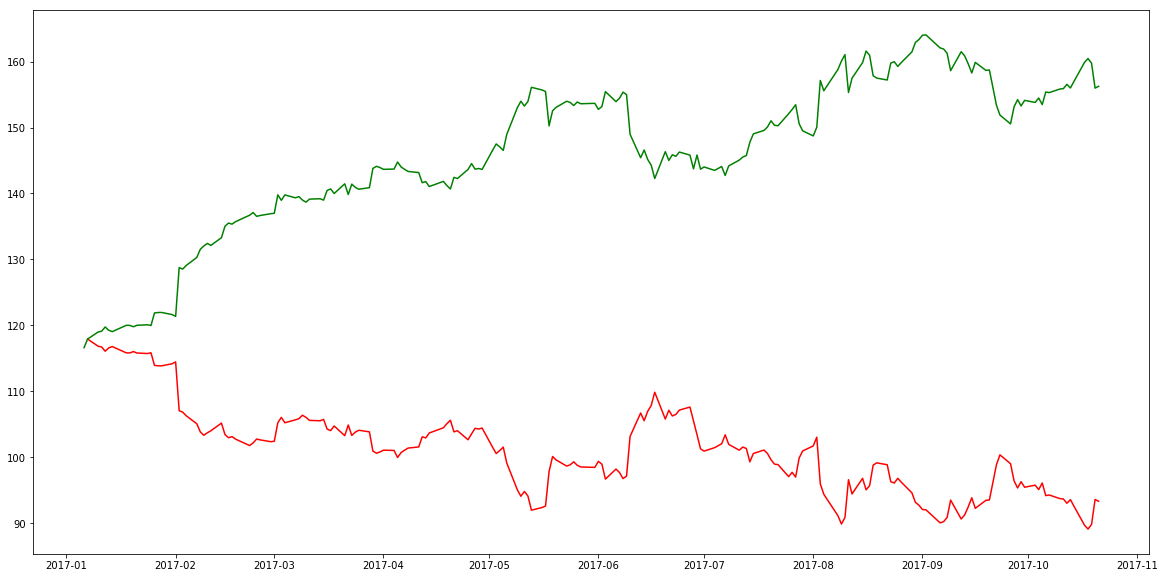

In [10]:
plt.figure(figsize=(20,10))
plt.plot(Trade_Test['Wealth'],color='r')
plt.plot(Trade_Test['price'],color='g')

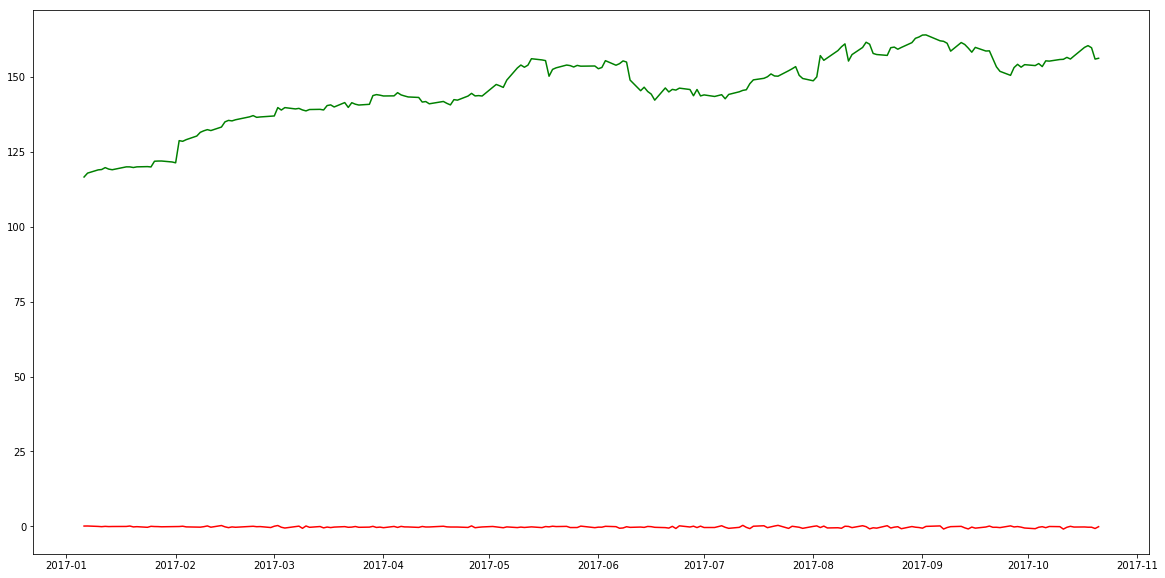

In [11]:

plt.figure(figsize=(20,10))
plt.plot(test_predict,color='r')
plt.plot(test_set['price'],color='g')



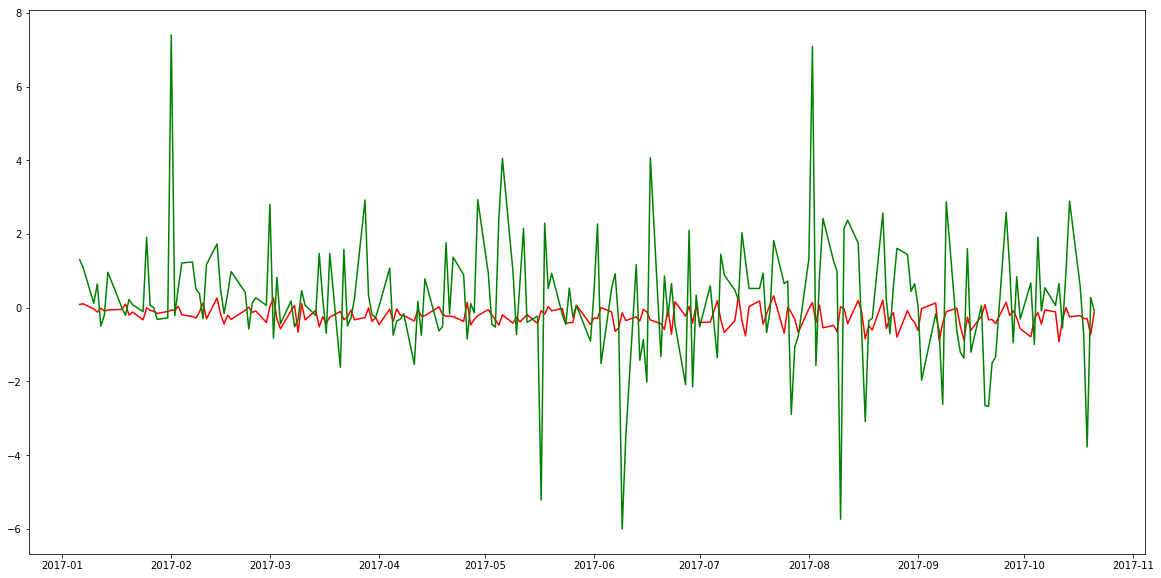

In [12]:

plt.figure(figsize=(20,10))
plt.plot(test_predict,color='r')
plt.plot(test_set['price_change'],color='g')